# EXPLORE

Summon the knights!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import source.funk as fun

Load the csv file to data frame

In [2]:
df = pd.read_csv('data/Test Report 2017-2018.csv')

Have a look at the data.

In [3]:
df.shape

(1061, 11)

- Rows: 1061
- Number of Features: 11

Features:

In [4]:
df.columns

Index(['Account Name', 'Contact: Title', 'Lead Source', 'Industry',
       'Mailing City', 'Mailing State/Province', 'Mailing Country', 'Amount',
       'Close Date', 'Created Date', 'Won'],
      dtype='object')

In [5]:
df.head(2)

,Account Name,Contact: Title,Lead Source,Industry,Mailing City,Mailing State/Province,Mailing Country,Amount,Close Date,Created Date,Won
0,Name 430,NaN,Existing Customer,Chemicals,NaN,NaN,NaN,"$18,000.00",11/5/2018,10/17/2018,1.0
1,Name 228,President,MKTG Call-in,Information Technology and Services,NaN,NaN,NaN,"$30,000.00",6/30/2018,5/15/2018,0.0


Check the data types and null-values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 11 columns):
Account Name              1061 non-null object
Contact: Title            896 non-null object
Lead Source               1056 non-null object
Industry                  959 non-null object
Mailing City              403 non-null object
Mailing State/Province    397 non-null object
Mailing Country           367 non-null object
Amount                    990 non-null object
Close Date                1056 non-null object
Created Date              1056 non-null object
Won                       1056 non-null float64
dtypes: float64(1), object(10)
memory usage: 91.3+ KB


- Every single feature except for Account Name presents null-values
- Only 40% of location information such as Country, State/Prob, City are not-null
- The single feature which provides a solid data type is Won, which is also the target.

## EDA & FEATURE ENGINEERING

### Target: Won

In [7]:
df['Won'] = df.Won.fillna(-1) # Nan values within my target? Not my tempo.
# df = df.fillna(-1)

Have a look at the counts.

In [8]:
df.Won.value_counts()

 0.0    750
 1.0    306
-1.0      5
Name: Won, dtype: int64

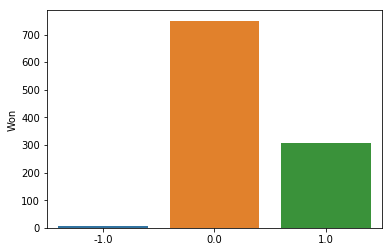

In [9]:
counts = df['Won'].value_counts()
sns.barplot(counts.index, counts);

- We have 5 null values within the target which I will get rid of due to insignificant amount.

In [10]:
df.drop(df[df.Won == -1].index, inplace=True)

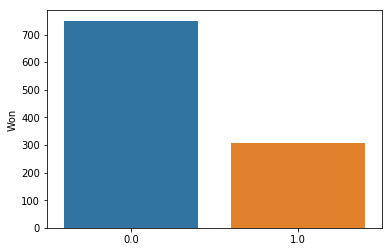

In [11]:
fun.seaborn_count_barplot(df,'Won')

Metrics

In [12]:
df.describe() 

,Won
count,1056.000000
mean,0.289773
std,0.453872
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Feature: "Account Name"

First of all I want to see if there are any duolicate account names.

Have a look at the unique results of value_counts of account names.

In [13]:
df['Account Name'].value_counts().unique() #here they are. Wow some people are really passinote about having multiple accounts. 

array([8, 7, 5, 4, 3, 2, 1])

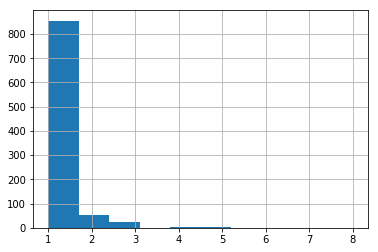

In [14]:
df['Account Name'].value_counts().hist()

Number of account names that are not unique

In [15]:
len(df['Account Name']) - len(df['Account Name'].unique())

122

Number of unique account names

In [16]:
len(df['Account Name'].unique())

934

Oh, my pardon. What if there are complete duplicate rows?

In [17]:
df["is_duplicate"]= df.duplicated()
print(df.is_duplicate.sum())
df.drop(['is_duplicate'],axis=1,inplace = True)

0


**Keypoint:** although there are no duplicate rows, there are 122 duplicate account names. Which may or may not be a problem.

Good news is most of the account names are unique. Bad news is I am not well informed about the business case here. Thus I am not sure, if this data is about a lottery, ROI, sales etc. Meaning that I am not sure if having duplicate account names in our analisis would hurt it or not.

Thereby I will drop duplicate accounts for the major part of the analisis.

On the other hand! Imagine a senario where Won stands for lottery wins, and some users tried it again and again. Would it change the result? 

Lets see if users eliminated fear of rejection from their emotional portfolio have higher chances of winning.

- Create a new series(not a new feature!) returning True if the account name is a duplicate.

In [18]:
df.duplicate_account_name = df['Account Name'].duplicated()

In [19]:
type(df.duplicate_account_name)

pandas.core.series.Series

- Create a new dataframe with only True values of duplicate_account_name column.

In [20]:
df_dubs = df[df.duplicate_account_name == True]

In [21]:
df_dubs.shape

(122, 11)

Winner customers(Won = 1): 67.2%
Other customers (Won = 0): 32.8%
Number of (Won = 1): 82
Number of  (Won = 0): 40


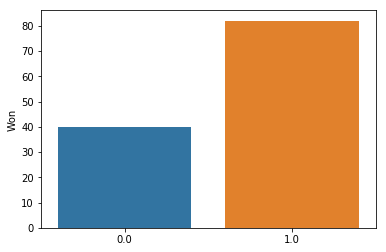

In [22]:
fun.seaborn_count_barplot_won(df_dubs,'Won')

   See the difference? Including only duplicate account names in the analisis increased the Won = 1 ratio from 29% to 67.2%. As said I am not sure about the nature of the business case, yet repetation leads to increased number of wins thats for sure!

Finally about this feature:

My thoughts about non-unique account names are based on analysis and we have only about a 1000 datapoint to analyze. Therefore I will involve each account within the analysis. However the issue shall be investigated. My questions are:
Are we recording this piece data properly?
Are our customers(or users depending on the business case) allowed to enroll multiple times?
The company shall take action depending on the answers of these questions.


### Feature: "Contact: Title"

Python perceives the datatype of the column as an object because of all the null values.

I want to change that:

In [23]:
df = df.fillna(-1)

In [24]:
df['Contact: Title'] = df['Contact: Title'].astype(str)

In [25]:
type(df['Contact: Title'][1])

str

Have a look at the number of unique values and unique values themselves.

In [26]:
len(df['Contact: Title'].unique()) # that number hurst my eyes, but pain is there to ignore.

411

In [27]:
df['Contact: Title'].unique()[0:20]  ## h[mm how about clustering these? two types of clusters! industry] and rank

array(['-1', 'President', 'VP of Consulting Services',
       'Operations and HR Manager', 'Business Development',
       'Vice President of Human Resources', 'COO',
       'Director of Hotel Sales', 'Director of HR', 'Owner', 'SVP', 'CEO',
       'Executive Managing Director', 'Regional Sales Manager',
       'Talent Acquisition Manager', 'Director of Strategic Partnerships',
       'HR Manager', 'Head of HR', 'Sales Manager', 'ceo'], dtype=object)

Printing first 20 unique values gave already gave me an idea. It is true that the feature looks fragmented at the first impression. However there are major similarities among the features.

example:
- HR Manager - Head of HR - Talent Acqusition Manager --> cluster under HR
- VP of Consulting Services, Vice President of.. --> cluster under rank 2 leadership

Putting in time and effort we can cluster them in order to create more features!


**New Feature: Rank(generated from Title)**

fun.title_ranks: clusters titles under leadership ranks.

example:

- owners, CEOs' etc. : rank 1
- VP : rank 2
- office manager : rank 4

In [28]:
df['rank'] = df['Contact: Title'].map(fun.title_ranks)

Distribution of the counts.

In [29]:
df['rank'].value_counts()

rank_1          350
rank_2          297
rank_unknown    160
rank_3          159
rank_4           90
Name: rank, dtype: int64

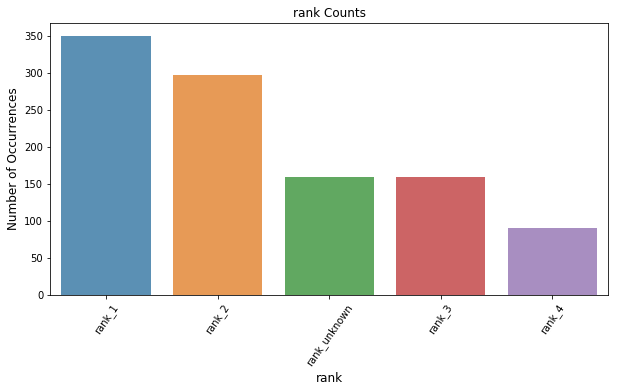

In [30]:
fun.plt_barplot(df,'rank')


In accordance to graph Customer Ranking Counts:
- The majority of the users are C-level or owners
- rank_unknown, stands for null values and numbered about 150 
- There is an exponential distribution from rank_1 to rank_4

Personally, I am interested into the behavioral differences of varrying segments.

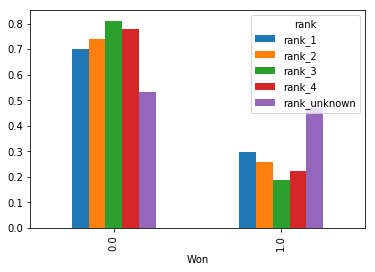

In [31]:
fun.binary_behaviour(df,'Won','rank')

- Win/Loss rate seem to balanced only for unknown ranks.

Lets have a closer look at the corrolations.

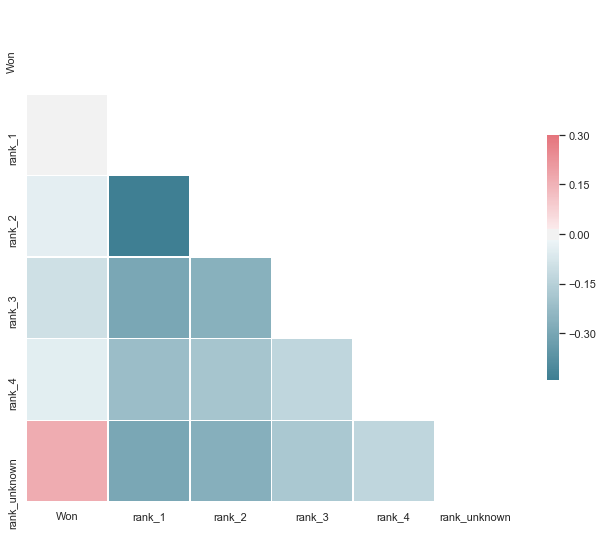

In [32]:
fun.heatmap(df,['rank'])

**New Feature: job_category**

In [33]:
df['job_category'] = df['Contact: Title'].map(fun.title_job_category)

In [34]:
df['job_category'].value_counts() 

HR            262
Owner_Ceo     250
S & M         160
n/a           160
Manager        51
OPS            42
Other          35
BD             22
Finance        18
Office         13
Culture        13
Consulting     10
Project         7
CLS             5
Product         5
Tech            3
Name: job_category, dtype: int64

Looks better compared to 400+ different targets eh?

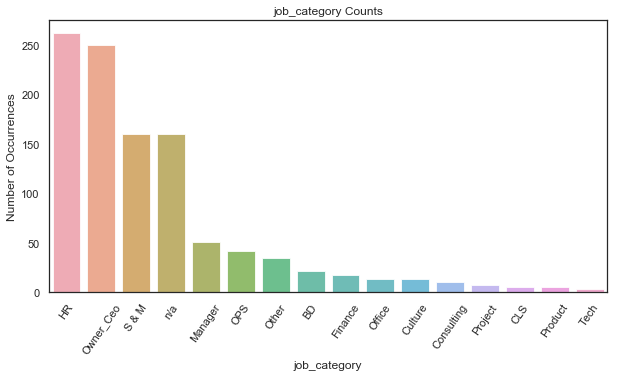

In [35]:
fun.plt_barplot(df,'job_category')

The pipeline is highly popular among HR professionals, Owners & CEOs as well as sales and marketing professional(Note: I wish I could separate sales from marketing yet due to high number of managers within the dataset, most sales managers also included marketing titles).

job_category  BD  CLS  Consulting  Culture  Finance   HR  Manager  OPS  \
Won                                                                      
0.0           16    4           6        9       15  200       39   33   
1.0            6    1           4        4        3   62       12    9   

job_category  Office  Other  Owner_Ceo  Product  Project  S & M  Tech  n/a  
Won                                                                         
0.0               11     21        176        2        6    126     1   85  
1.0                2     14         74        3        1     34     2   75  


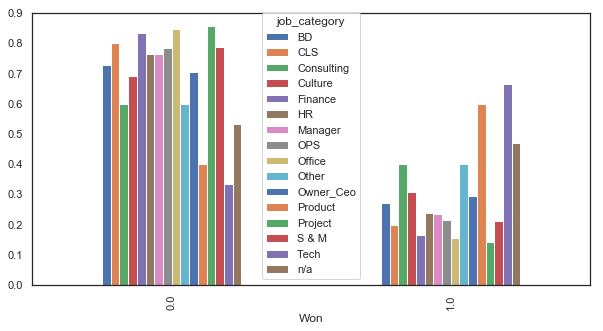

In [36]:
fun.binary_behaviour_with_numbers(df,'Won','job_category')

- The win rate is dominant only for tech and product professionals.
- I want to highlight that the number of tech and product people are not significant within the
dataset. So their higher win rate is just a result of the fact that they are outliers. Increasing their numbers within the dataset would lead to a similar distribution with those of other job fields.

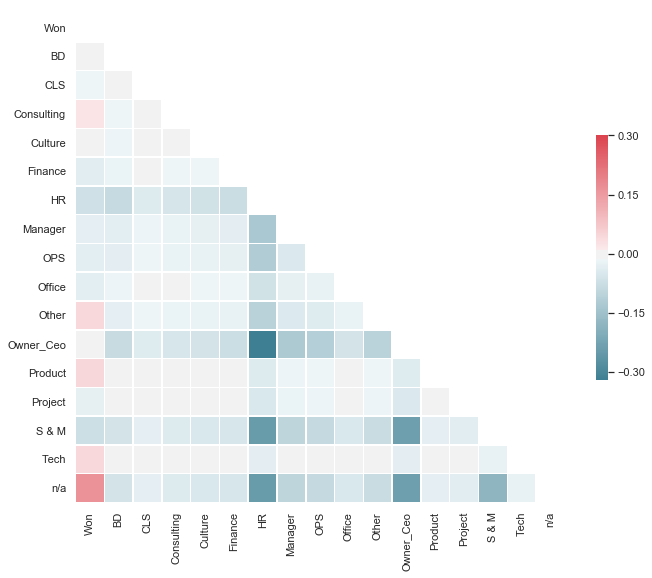

In [37]:
fun.heatmap(df,['job_category'])

- n/a presents the highest corrolation with Won
- Another interesting insight is that more frequently occupied job_dategories generally provides a weak negative corrolation with Won whereas outlier categories positively corrolated at high level.

### Feature: Lead Source

In [38]:
df['Lead Source'].unique()

array(['Existing Customer', 'MKTG Call-in', 'Sales - Partner',
       'MKTG - Web (Contact Form)', 'Google Ad', 'Google Natural Search',
       'Referral- Network', 'Delivery', 'MKTG Email - @Peak',
       'MKTG Adv - Linkedin', 'MKTG Trade Show', 'Referral-Customer',
       'MKTG Adv - Google Adwords', 'Bing Natural Search', 'LinkedIn',
       'BuiltinChicago', 'Sales', 'Bing PPC', 'MKTG Referral - Partner',
       'MKTG Adv - Google Adwords - Call-in', 'MKTG - Web (Chatbot)',
       'MKTG LinkedIn Outreach', 'Ask.com Natural Search',
       'MKTG Word of mouth', 'MKTG Adv - BING', 'Yahoo! Natural Search',
       'Referral-Employee', 'MKTG Email - Back to Base V2',
       'Referral-Other', 'MKTG Public Relations'], dtype=object)

In [39]:
df['Lead Source'].value_counts()

Google Natural Search                  245
MKTG Call-in                           223
MKTG - Web (Contact Form)              206
Existing Customer                      137
MKTG Adv - Google Adwords               74
MKTG Referral - Partner                 24
Google Ad                               20
MKTG Email - @Peak                      17
Bing Natural Search                     17
MKTG Adv - Linkedin                     14
Sales                                   12
Referral- Network                       12
Delivery                                10
MKTG Adv - Google Adwords - Call-in     10
Referral-Customer                        6
MKTG Adv - BING                          6
MKTG - Web (Chatbot)                     3
Referral-Other                           2
MKTG Word of mouth                       2
Bing PPC                                 2
Sales - Partner                          2
Referral-Employee                        2
LinkedIn                                 2
Yahoo! Natu

MKTG, Google, existing customer and referrals seem to be the most dominant groups.

- Cluster under these grouops

Noticed the number of subcategories within MKTG and Google? They may provide valuable information.

- Check the subcategories for MKTG and Google

In [40]:
df['lead_group'] = df['Lead Source'].map(fun.lead_group_donut)

In [41]:
df.lead_group.value_counts()

 MKTG                583
Google               265
Existing Customer    137
Other                 49
Referral              22
Name: lead_group, dtype: int64

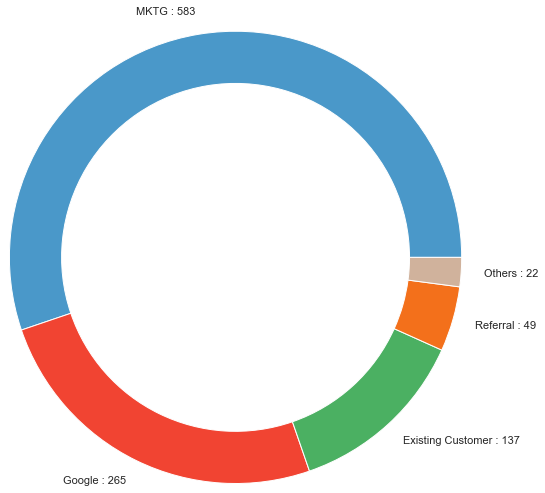

In [42]:
fun.outter_donut(df,fun.group_size(df)[0],fun.group_size(df)[1])

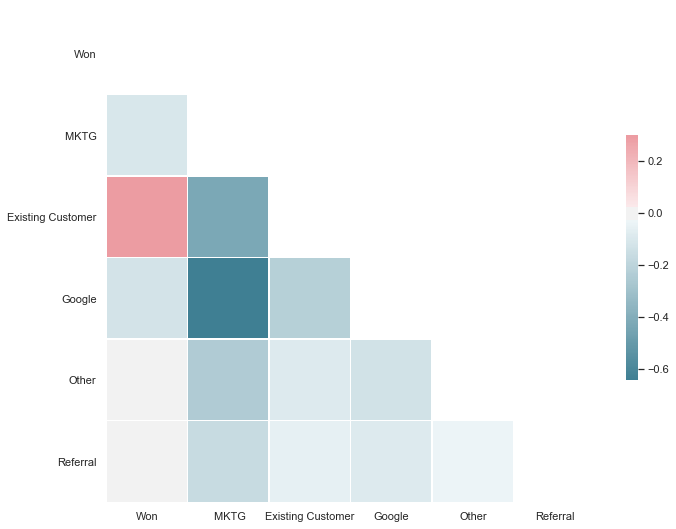

In [43]:
fun.heatmap(df,['lead_group'])

Existing customers are positively corrolated with Won whereas Google and MKTG are weak negative corrolated with the same target.

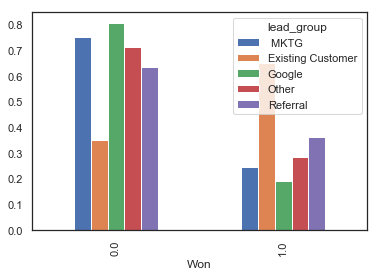

In [44]:
fun.binary_behaviour(df,'Won','lead_group')

- ~ 65%of existing customers end up with Won == 1 which is significantly higher compared to not only other lead_source groups but also overal average.
- Ultimatelly, trust is a thing. Who would guess that?

**Subcategory of Lead Source: MKTG**

create a new data frame only for MKTG, called df_mktg.

In [45]:
def find_mktg(x):
    if 'MKTG' in x:
        return x
    else:
        return 0

df['mktg'] = df['Lead Source'].map(find_mktg)
df_mktg = df[df.mktg != 0]

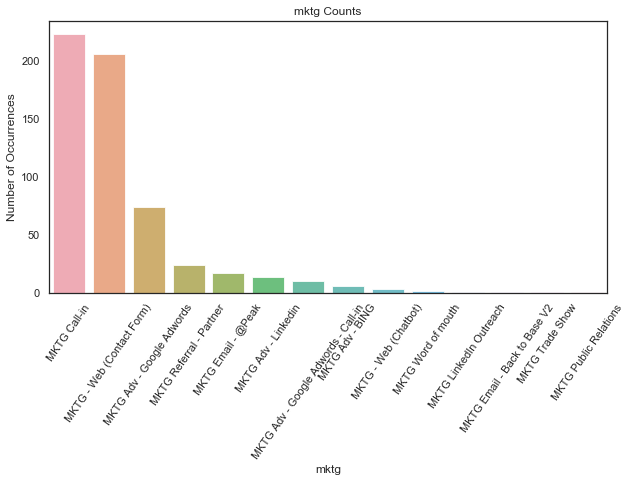

In [46]:
fun.plt_barplot(df_mktg,'mktg')

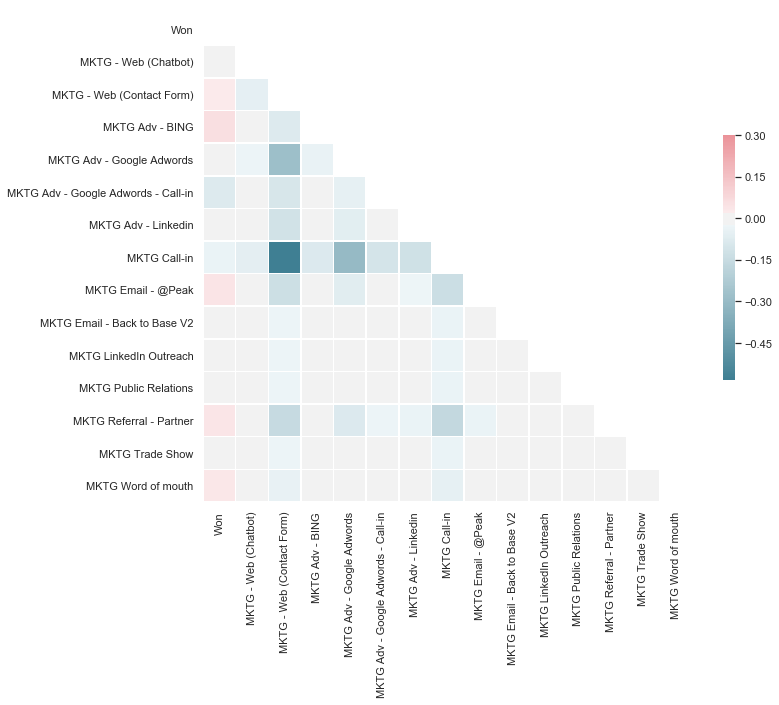

In [47]:
fun.heatmap(df_mktg,['mktg'])

- Again most of the positive corrolations account for subgroups that are not dominant in terms of counts.
- When it comes to Call-in, there is a weak negative corrolation with Won.

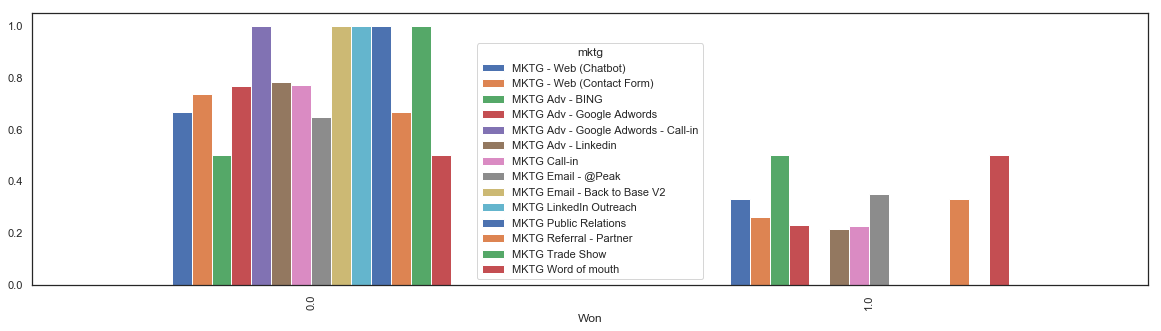

In [48]:
fun.binary_behaviour_with_large_numbers(df_mktg,'Won','mktg')

In [49]:
# you can make this graph can communicate better.
## TO DO:
#add some more colours for this graph, 
#or get rid of less frequently occuring features
#and concentrate your analisis on dominant ones.

**Sub Category of Lead Source: Google**

In [50]:
def find_google(x):
    if 'Google' in x:
        return x
    else:
        return 0

df['google'] = df['Lead Source'].map(find_google)
df_google = df[df.google != 0]

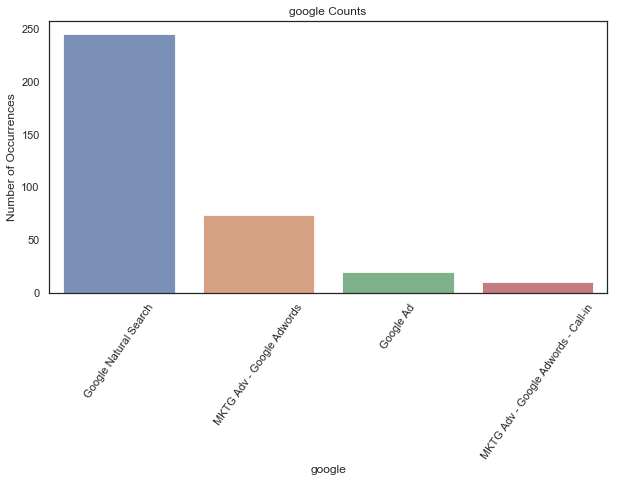

In [51]:
fun.plt_barplot(df_google,'google')

Google actually does a lot of work for the company here. 

- Natural search engine brings in a lot of leads and Adv contributes by ~ 1/3 of the natural search engine.

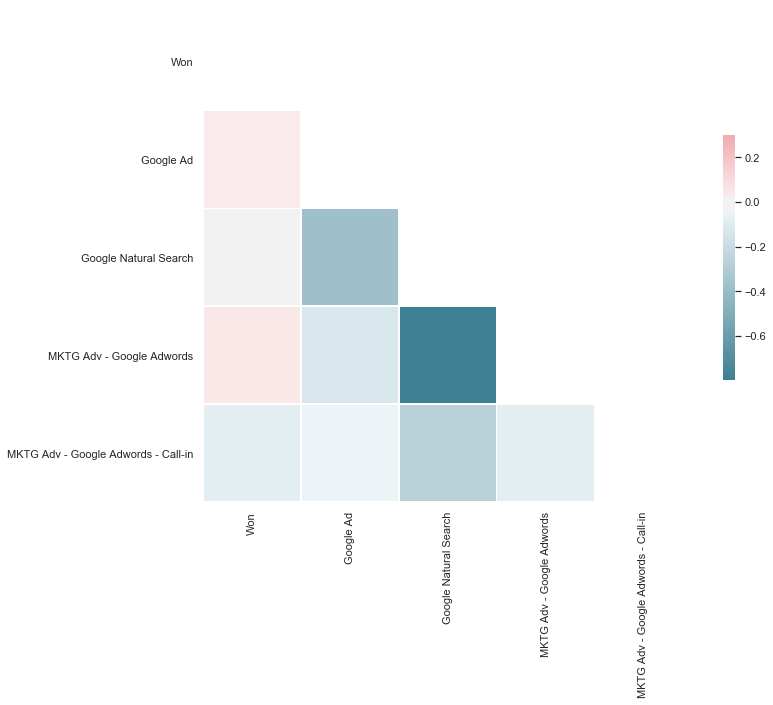

In [52]:
fun.heatmap(df_google,['google'])

When it comes to conversion rates, Adv seem to works well.

I really wonder what is the problem with Call-in. Although not strong the corrolation with conversion rate is negative for each case of call-ins.

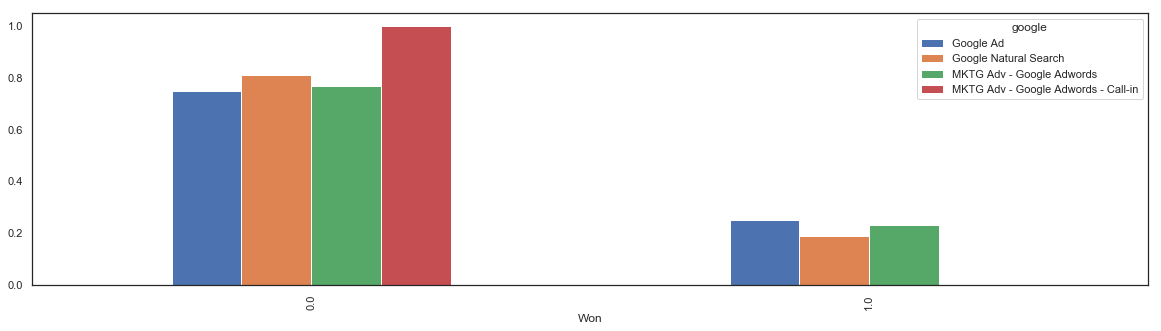

In [53]:
fun.binary_behaviour_with_large_numbers(df_google,'Won','google')

### Feature: Industry

In [54]:
len(df.Industry.unique())

96

In [55]:
df['Industry'].value_counts()

Computer Software                       135
Information Technology and Services     111
-1                                       97
Manufacturing                            69
Consulting                               62
Retail                                   51
Other                                    42
Finance                                  35
Technology                               29
Construction                             26
Financial services                       24
Telecommunications                       23
Machinery                                19
Internet                                 15
Marketing and Advertising                14
Chemicals                                11
Consumer Goods                           11
Electrical/Electronic Manufacturing      10
Packaging and Containers                 10
Mechanical or Industrial Engineering      9
Staffing and Recruiting                   9
Logistics and Supply Chain                9
Health Wellness and Fitness     

We have a tone of industries which are not dominant in numbers. I will group them in order to have a closer look at what is happening with dominant industries.

In [56]:
df = fun.industry_group(df,'Industry')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cbd2940>],
      dtype=object)

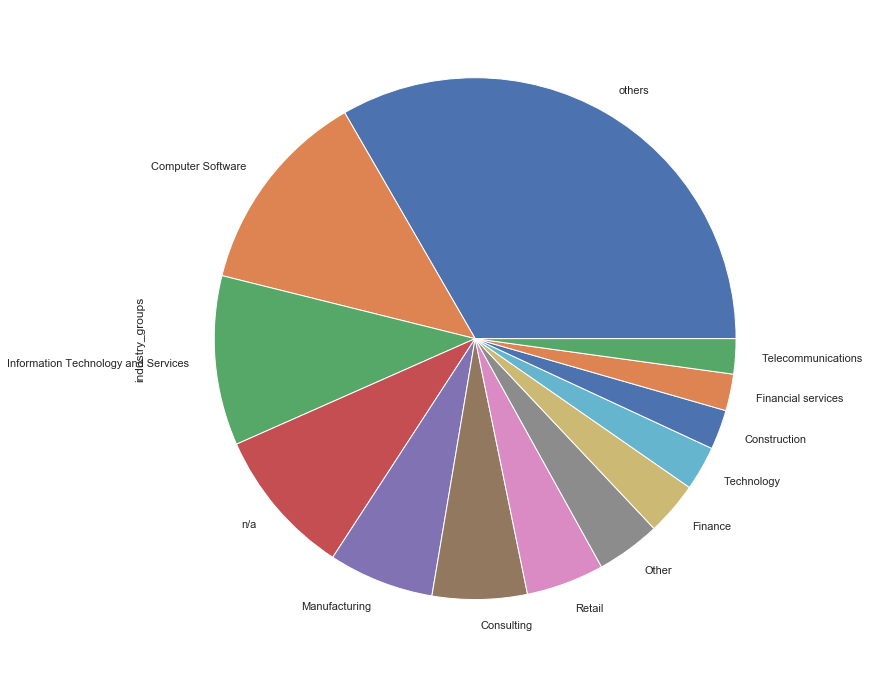

In [57]:
# df['industry_groups'] = df['industry_groups'].astype(str)
df['industry_groups'] = df['industry_groups'].astype(str)
df['industry_groups'].value_counts().plot(kind='pie', subplots=True, figsize=(12, 12))

- Looks like the majority of the industries are numberred under 20.

- However the majority of industries account for a IT and computer software

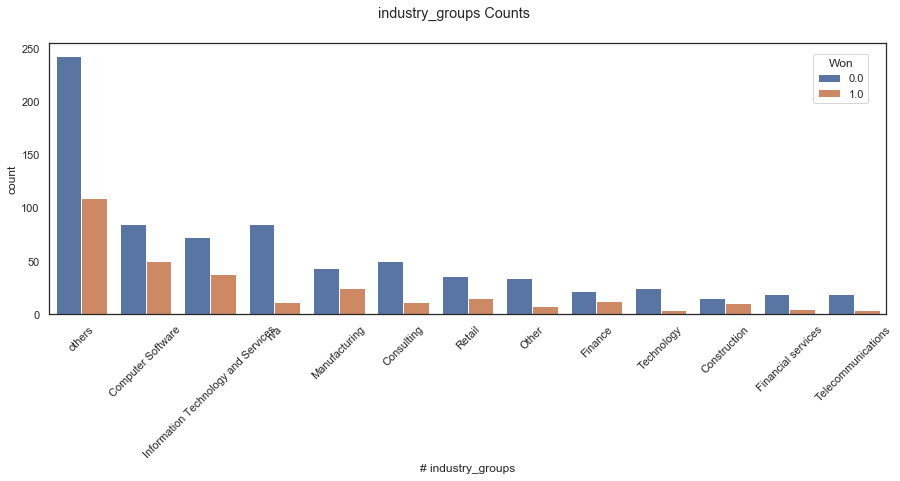

In [58]:
fun.barplot_vs(df,'industry_groups','Won')

The behavioral distribution seem to be the same for each industry group.

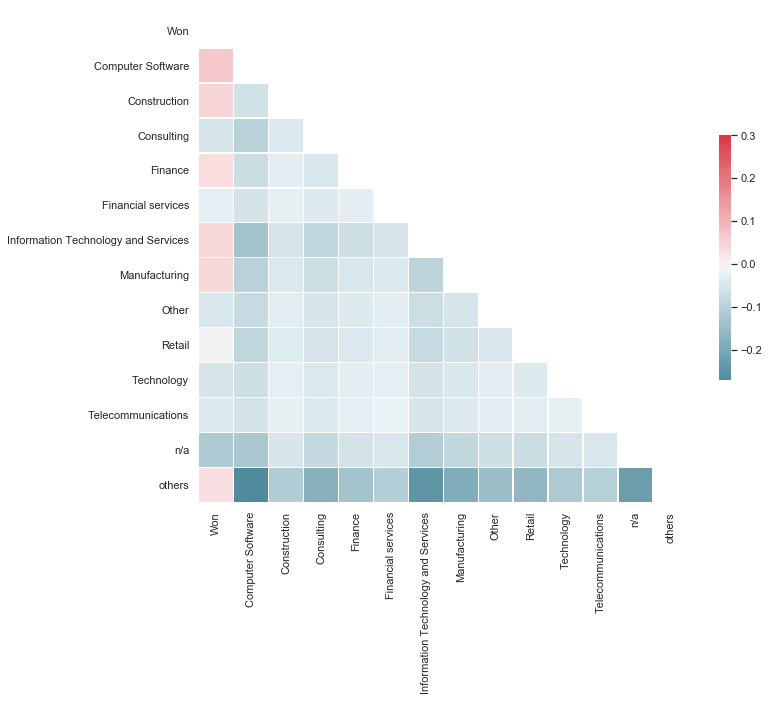

In [59]:
df_heat_map_industry_groups = df[['Won','industry_groups']]
fun.heatmap(df_heat_map_industry_groups,['industry_groups'])

### Features: Location: 'Mailing City','Mailing State/Province','Mailing Country'

In [60]:
df_location = pd.read_csv('data/Test Report 2017-2018.csv')
df_location = df_location[['Won','Mailing City','Mailing State/Province','Mailing Country']]

In [61]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 4 columns):
Won                       1056 non-null float64
Mailing City              403 non-null object
Mailing State/Province    397 non-null object
Mailing Country           367 non-null object
dtypes: float64(1), object(3)
memory usage: 33.2+ KB


Location data consists of high numbers of null values.

In [62]:
df_location.fillna(-1,inplace=True)
df_location = df_location[df_location['Won']!=-1]

In [63]:
df_location['Mailing City'].value_counts()[0:15]

-1               653
New York          15
London            14
Toronto           14
San Francisco     10
Mississauga       10
Ottawa             7
Boston             7
Chicago            5
Montreal           4
Raleigh            4
Richmond           4
Brooklyn           4
Dallas             3
Pittsburgh         3
Name: Mailing City, dtype: int64

No,this one is incredibly fragmented. Im not doing that.

In [64]:
df['Mailing State/Province'].value_counts()[0:15]

-1               659
CA                35
ON                27
Ontario           25
California        20
NY                15
Florida           15
New York          14
MA                13
IL                10
Massachusetts     10
TX                 9
PA                 9
VA                 7
BC                 7
Name: Mailing State/Province, dtype: int64

- CA on one hand California at the other hand.
- Have some potential, this one due to less fragmented data(Yoda is alive).

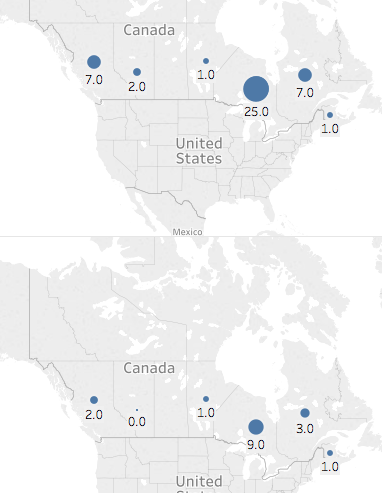

In [65]:
from IPython.display import Image
Image("Tablo/pic1.png") 
#tableau public visuals, yeah yeah I know haters gona hate. 
#yeah btw thats how you can Include screenshots on your ipython notebook.

When it comes to Canadian provinces, Ontario seem to be the most dominant one in terms of enrollments and winners.

In [66]:
df_location['Mailing Country'].value_counts()[0:10]

-1                          689
United States               151
Canada                       64
US                           61
USA                          22
United States of America     19
United Kingdom               11
England                       9
Australia                     4
UK                            4
Name: Mailing Country, dtype: int64

Number of United States is many as that of 4th of July.

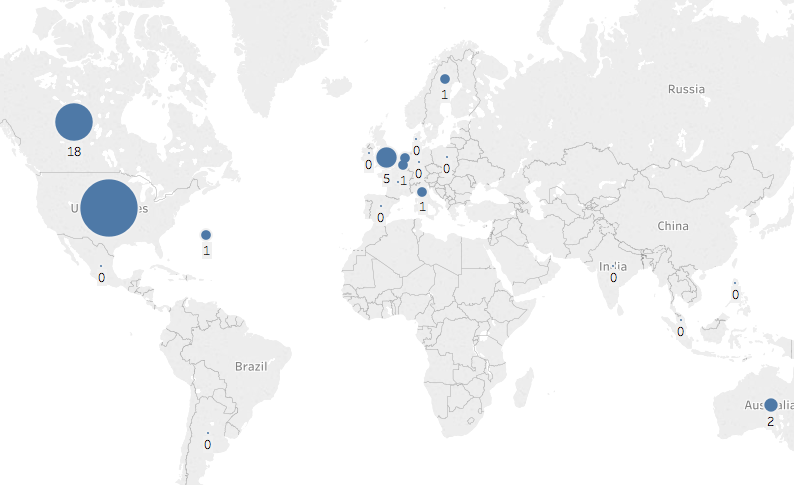

In [67]:
Image("Tablo/pic2.png") #tableau public visuals 

Looks Like we have winners all around the globe, most dominantly from USA(Won == 1)

**Location - TO DO**: 
- Feature engineer the location(cluster them, typewise find similarities 
- Find out what data groups are corrolated with the target.
- Get some predictive power out of these(oyeah its not part of the project, nevertheless I want to run 2-3 basic machine learning models on the data.)

### Feature: Amount

In [68]:
type(df.Amount[0])

str

In [69]:
df.Amount[0]

'$18,000.00'

A string you are, that shall change.

In [70]:
df['Amount'] = df.Amount.map(fun.amount_it)

In [71]:
df.Amount.describe()

count      1056.000000
mean      28461.599432
std       28893.015145
min          -1.000000
25%       18000.000000
50%       21000.000000
75%       30000.000000
max      375000.000000
Name: Amount, dtype: float64

Mean is equal to standard deviation. Doesn't sound like a normal distribution.

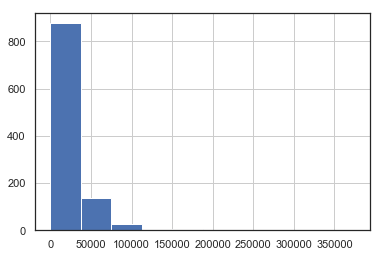

In [72]:
df.Amount.hist()

Just to let remind you; you will see such a graph only when there are outliers or crazy values.

I will group these in order to have a better overview.

In [73]:
def amount_groups(x):
    linspace = np.linspace(min(df.Amount),max(df.Amount)*0.8,100)
    if x >= 0:
        for i in range(len(linspace)-1):
            if x > linspace[i] and x < linspace[i+1]:
                return round(linspace[i])
            elif x > max(df.Amount)*0.8:
                return max(df.Amount)*0.8
        

    else:
        return x

In [74]:
df['Amount_group'] = df.Amount.map(amount_groups)

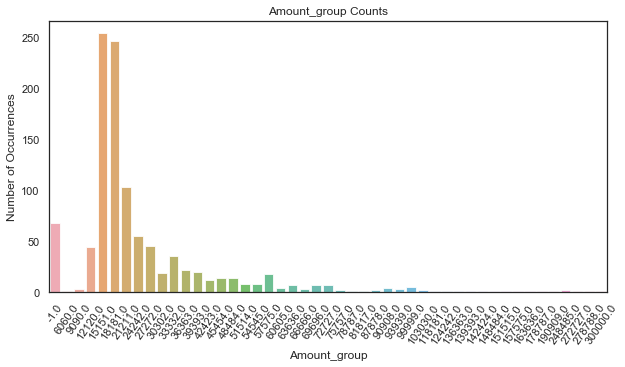

In [75]:
fun.plt_barplot(df,'Amount_group')

- Have about 60 null values --> try to figure out if they are actuals nulls or undocumented 0s.
- The rest of the distribution looks like an exponential distribution.

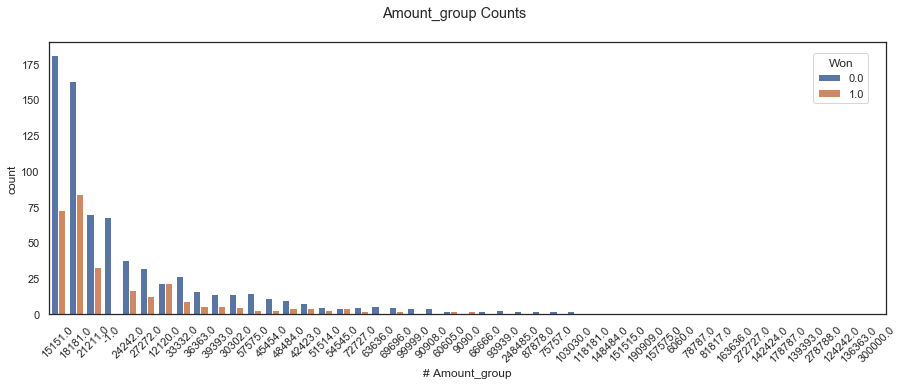

In [76]:
fun.barplot_vs(df,'Amount_group','Won')

- Can it be true? In accordance to this graph accounts with null amounts did not win anything. In other words, maybe(just an assumption) null values correspond to 0 investment? 

Need to have a closer look here.

Creating 2 seperate dataframes where Amount is null(-1) and Amount is 0. If Won == 0 for each and every datapoint in both dataframes I will assume that when amount == 0 won is also 0 for 100% and amount == -1 means amount is simply a undocumented 0.

Winner customers(Won = 1): 0.0%
Other customers (Won = 0): 100.0%
Number of (Won = 1): 0
Number of  (Won = 0): 68


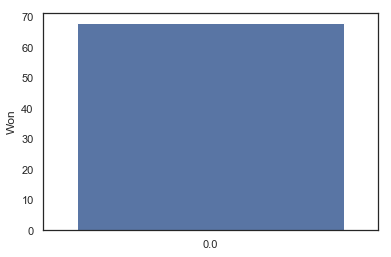

In [77]:
df_amount_null = df[df['Amount_group'] == - 1]
fun.seaborn_count_barplot_won(df_amount_null,'Won')

In [78]:
df_amount_0 = df[df['Amount'] == 0]
print(df_amount_0.shape[0])
print(df_amount_0.Won)

1
453    0.0
Name: Won, dtype: float64


A problem here, there is only one datapoint where amount == 0. However the Won = 0 for that particular datapoint.

Certainly I can not be confident about my assumption which states that null values within the amount feature means in fact an undocumented 0. However I will replace -1 with 0 for amount in order to make things slightly more interesting as I stick with my weakly supported assumption.

**Note_for_my_self =** In case you decide to run an predictive model which targets feature: Won, amount null or 0 will probably lead to overfit. See what you can do about it, colinearity is there and it is real.

In [79]:
def fix_amount_nulls(x):
    if x == -1:
        return 0
    else:
        return x
df['Amount'] = df.Amount.map(fix_amount_nulls)

### Features: TIME : Close Date, Created Date

In [80]:
import warnings
warnings.filterwarnings('ignore') 

Reminder: There are no null values here.

Data type:

In [81]:
print(df['Close Date'][0])
print(type(df['Close Date'][0]))

11/5/2018
<class 'str'>


I want to see if there is any awkward dates here. Such as created date is greater than close date. Yet I need to feature engineer the time data first.

In [82]:
df['Close_Date'] = pd.to_datetime(df['Close Date'])
df['Created_Date'] = pd.to_datetime(df['Created Date'])

Have a look at the changes.

In [83]:
print(df['Close_Date'][0])
print(type(df['Close_Date'][0]))

2018-11-05 00:00:00
<class 'pandas._libs.tslib.Timestamp'>


What year is this?!

In [84]:
df.Close_Date.dt.year.unique()

array([2018, 2017])

In [85]:
df.Created_Date.dt.year.unique()

array([2018, 2017, 2016])

Some accounts created as early as 2016 and I want to see if there is a behavioral difference among different years

In [86]:
df['close_year'] = df.Close_Date.dt.year
df['create_year'] = df.Created_Date.dt.year

In [87]:
sns.set_palette('Set2') ## needed a small change here... 

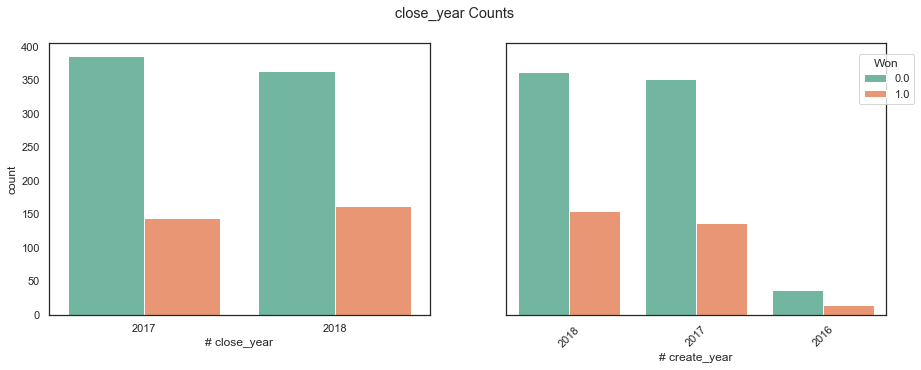

In [88]:
fun.barplot_double_vs(df,'close_year','create_year','Won')

- Accounts that are closed by 2018 had higher chances of Won == 2018 compared to those of 2017.
- Accounts that are created in 2016 had slightly higher probability of Won == 1

### New Feature: Registered days = Close_Date - Created_Date

In [89]:
df['Registered_Days'] = df['Close_Date'] - df['Created_Date']

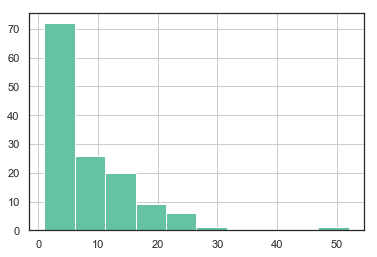

In [90]:
df['Registered_Days'].value_counts().hist()

In [91]:
type(df['Registered_Days'][0]) #not you little one. You can not be a timedelta.

pandas._libs.tslib.Timedelta

In [92]:
df['Registered_Days'] = df['Registered_Days'].dt.days
type(df['Registered_Days'][0]) # gotcha!

numpy.int64

In [93]:
df[['Amount','Registered_Days','Won']].describe()

,Amount,Registered_Days,Won
count,1056.000000,1056.000000,1056.000000
mean,28461.661932,39.454545,0.289773
std,28892.953519,36.257005,0.453872
min,0.000000,-40.000000,0.000000
25%,18000.000000,10.000000,0.000000
50%,21000.000000,31.000000,0.000000
75%,30000.000000,61.000000,1.000000
max,375000.000000,259.000000,1.000000


Looks like someones account was valid for -40 days. Which is not really possible. Another problematic feature there.

Number of anormal registered days:

In [94]:
(df['Registered_Days'] < 0).sum()

11

We have some time benders here. 

In [95]:
df[df['Registered_Days'] < 0].Registered_Days.value_counts()

-3     3
-1     3
-5     2
-25    1
-40    1
-4     1
Name: Registered_Days, dtype: int64

Any Won == 1 occurances among time benders?

In [96]:
df[df['Registered_Days'] < 0].Won

127     0.0
402     1.0
433     1.0
597     1.0
637     1.0
788     1.0
809     1.0
909     1.0
974     0.0
993     1.0
1000    1.0
Name: Won, dtype: float64

Yeah there are! So these are not fake accounts or anything. Somehow they are documented in wrong manner. Actually their personalies are amazing. I mean look at the 85% Won == 1 rate among. 

**Thoughts About Anormal Registered_Days:**
- Shall I replace these anormal registered days with the average or median of registered days?

or

- It actually means something when the recorded created date is later than closed date of the account?
Maybe these guys are hackers because their win rate is really high. And maybe Alliens are around us...

Too much thought process here. On the other hand, personally I support being slightly spectical about the data and its outcomes. I am not going to concentrate my efforts on this, yet it may be benefitial to note that these accounts' win rates shall not be underestimated.

Replace anormal dates with average of the same feature.

In [97]:
print(df[df.Registered_Days > 0].Registered_Days.mean())
print(df[df.Registered_Days > 0].Registered_Days.median())

42.04934541792548
37.0


Almost similar values, I am going with the median.

In [98]:
def fix_registered_days(x):
    if x < 0:
        return df[df.Registered_Days > 0].Registered_Days.median()
    else:
        return x
df['Registered_Days'] = df['Registered_Days'].map(fix_registered_days)

Note: I will concentrate on close_year from now on because that is when results of Won reach a conclusion.

In [99]:
df_close = df.drop(['Created_Date'],axis = 1)

In [100]:
df_close.close_year.value_counts().sum()

1056

In [101]:
df_close.shape

(1056, 22)

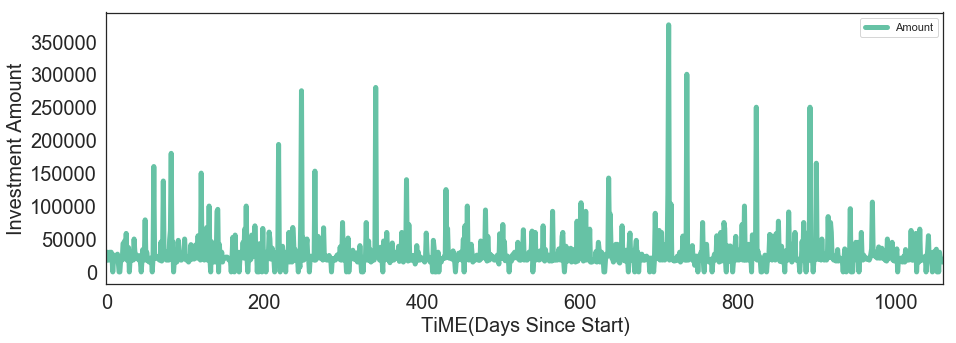

In [102]:
df_close[['Amount']].plot(figsize=(15,5), linewidth=5, fontsize=20)
# df_create[['Amount_test']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Investment Amount', fontsize=20);
plt.xlabel('TiME(Days Since Start)', fontsize=20);

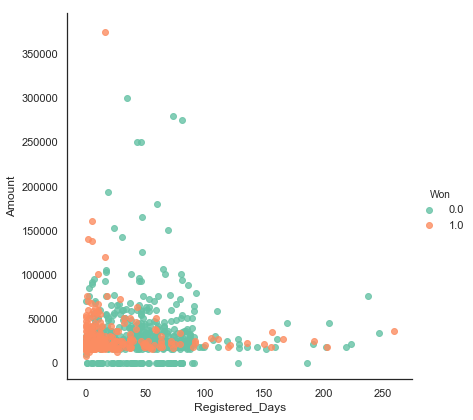

In [103]:
sns.lmplot(x='Registered_Days', y='Amount', fit_reg=False, data=df, hue='Won',size = 6)

- Most accounts led to Won == 1 did not wait more than 100 days
- The conversion or win rate for account owners that wait longer is higher.

526
162
530
144
0.1534090909090909% of attendies Won in 2018
0.13636363636363635% of attendies Won in 2017


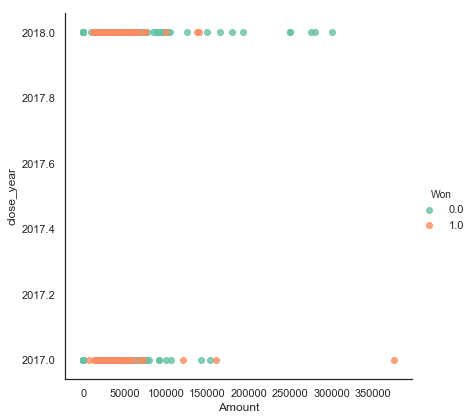

In [104]:
sns.lmplot(x='Amount', y='close_year', fit_reg=False, data=df_close, hue='Won',size = 6);
print((df_close.close_year == 2018).sum())
print(((df_close.close_year == 2018) & (df.Won == 1) ).sum())
print((df_close.close_year==2017).sum())
print(((df_close.close_year == 2017) & (df.Won == 1) ).sum())
print(f'{((df_close.close_year == 2018) & (df.Won == 1) ).sum() / df.shape[0]}% of attendies Won in 2018')
print(f'{((df_close.close_year == 2017) & (df.Won == 1)).sum() / df.shape[0]}% of attendies Won in 2017')

- There is a small difference between winrates of year 2017 and 2018.
- In addition to slightly increased conversion rates, number of accounts which invested/played higher amonts of money increased.
- **Assumption:** See that single outlier which is Won == 1 and amount > $ 350k at year 2017. 

My intuation tells me that, it is kind of a customized value for marketing purposes. 2017 was the first year that there was a conclusion about Won. And the prize, for the first trial shall be significant in order to leverage outcomes of marketing and sales. Who knows, maybe increased amounts of finances for the second year is due to the fact that people heard said "I won $ 350k!".

Back to historical facts for now.

### Total Amount Won and Invested for 2017 and 2018

won_amount_2018: $4446500
non_won_amount_2018: $11712730
amount_total_2018: $16159230


won_2018: 15.0%


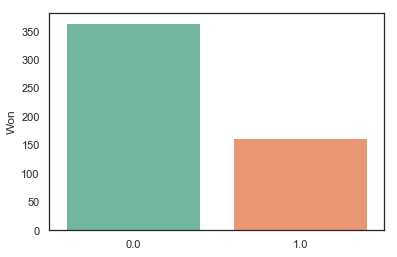

In [105]:


won_amount_2018 = df_close[(df_close.close_year == 2018) & (df_close.Won == 1)].Amount.sum()
non_won_amount_2018 = df_close[(df_close.close_year == 2018) & (df_close.Won == 0)].Amount.sum()
amount_total_2018 = won_amount_2018 + non_won_amount_2018



df_close_2018 = df_close[df_close.close_year == 2018]
counts = df_close_2018['Won'].value_counts()
sns.barplot(counts.index, counts);

print(f"won_amount_2018: ${won_amount_2018}")
print(f"non_won_amount_2018: ${non_won_amount_2018}")
print(f"amount_total_2018: ${amount_total_2018}")
print('\n')
print(f"won_2018: {round(df_close_2018.Won.sum()/df_close.shape[0],2)*100}%")

won_amount_2017: $4149785
non_won_amount_2017: $9746500
amount_total_2017: $13896285


won_2017: 14.000000000000002%


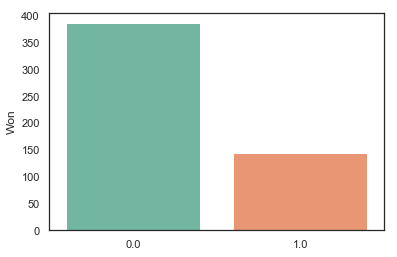

In [106]:
won_amount_2017 = df_close[(df_close.close_year == 2017) & (df_close.Won == 1)].Amount.sum()
non_won_amount_2017 = df_close[(df_close.close_year == 2017) & (df_close.Won == 0)].Amount.sum()
amount_total_2017 = won_amount_2017 + non_won_amount_2017



df_close_2017 = df_close[df_close.close_year == 2017]
counts = df_close_2017['Won'].value_counts()
sns.barplot(counts.index, counts);

print(f"won_amount_2017: ${won_amount_2017}")
print(f"non_won_amount_2017: ${non_won_amount_2017}")
print(f"amount_total_2017: ${amount_total_2017}")
print('\n')
print(f"won_2017: {round(df_close_2017.Won.sum()/df_close.shape[0],2)*100}%")

In [107]:
Amount_won_diff = won_amount_2018 - won_amount_2017
Amount_non_won_diff = non_won_amount_2018 - non_won_amount_2017
amount_total_diff = amount_total_2018  - amount_total_2017

increase = amount_total_diff / amount_total_2017

print(f"Amount_won_diff: ${Amount_won_diff}")
print(f"Amount_won_diff_ratio: {round((Amount_won_diff / won_amount_2017) * 100,2)}%")
print("---------------------------------")
print(f"Amount_non_won_diff: ${Amount_non_won_diff}")
print(f"amount_total_diff: ${amount_total_diff}")
print(f"increase: {round(increase*100,2)}% from 2017 to 2018")

Amount_won_diff: $296715
Amount_won_diff_ratio: 7.15%
---------------------------------
Amount_non_won_diff: $1966230
amount_total_diff: $2262945
increase: 16.28% from 2017 to 2018


I wonder how does win/loss rates varry among 12 months of the year.

In [108]:
df['month'] = df.Close_Date.dt.month
df_months = df[['Won','month']]

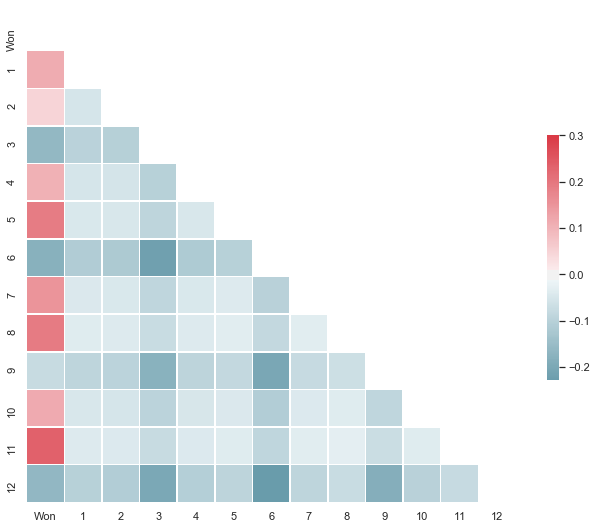

In [109]:
fun.heatmap(df_months,['month'])

- Strong positively corrolated months with Won:  November, August, May
- Weak positively corrolated months with Won: April , July, October, Jan
- Negatively corrolated months with Won: March, June, December

Noticed an interesting pattern? Check the months couples April : May, July : Aug, October : November

- Somehow within each month couple, the first month warmed up the corrolations and at the second month corrolations peaked.
- Moreover, as if the busines is resting or waters are calming at the following third month, corrolations are negative. A patterns which repeats itself for 3 times given 12 corrolations. That can not happen by pure luck.

I really wonder the nature of the business case here. I have a million assumptions which can be catchy but also deadly for a data scientist.

-

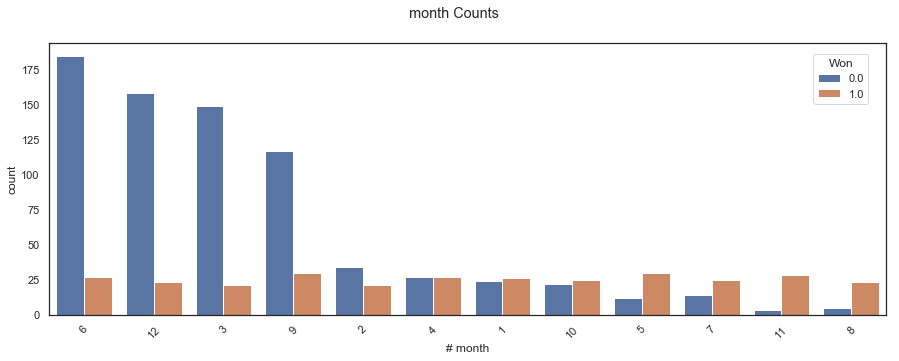

In [110]:
fun.barplot_vs(df_months,'month','Won')

- Looks like the standard deviation for number of Won == 1 through the months is a low number. Number of winners seems to be constant within a limited space.
- On the other hand the winrate varries a lot. Compare that win rate for 6th month with 11th.

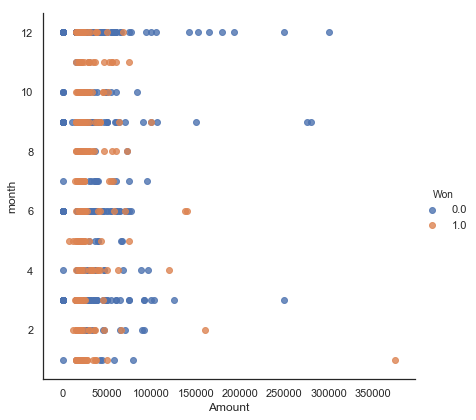

In [111]:
sns.lmplot(x='Amount', y='month', fit_reg=False, data=df, hue='Won',size = 6);

- I am more confident about my assumption which states that the initial $ 350k+ is customized in order to leverage marketing & sales which will populate the pipeline with more accounts. 

Howcome? 
- We know that 350k Won ==1 accounts for 2017 which is the first year of any Closed_date. Now we also know that the same amount accounts for the first month of 2017. 

What are the odds? The highest amount offering succeeded through the first month of the first year possible year. Following year the pipeline becomes more crawded. Good story.

There is one more question in my mind: Can we build a binary classifier predictive model to find out which accounts lead to Won == 1? 

Ofcourse we can.
- Found all the corrolations
- Created subcategories and new features
- The target is balanced
- Good vibes is real, deep house music is with me.

Looks like we have everything we need to build that model.

**to do:** build a model and play with it. 

### Behind The Scenes

You have this incredibly complicated business model? Looking for answers and can't find them? Are you in pain? 

Let me be your guide:

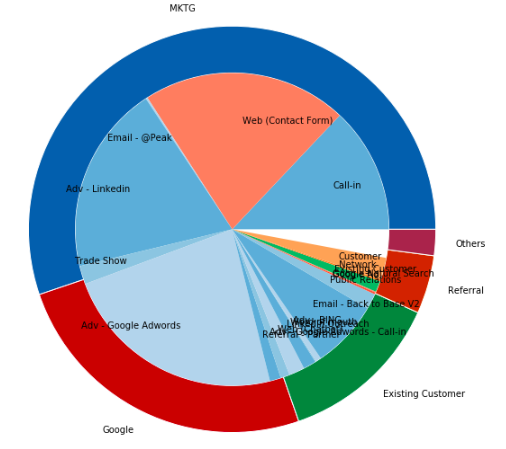

In [115]:
Image("Tablo/pain.png")  
#the ancients call it: "good effort"
#my mother calls it: "amazing"
#Other data scientists call it: "What is wrong with you?"
#I call it: "I will create something useful out of you."

You see, time is continious, ongoing and unstopable. Like a blue longlasting wave. 

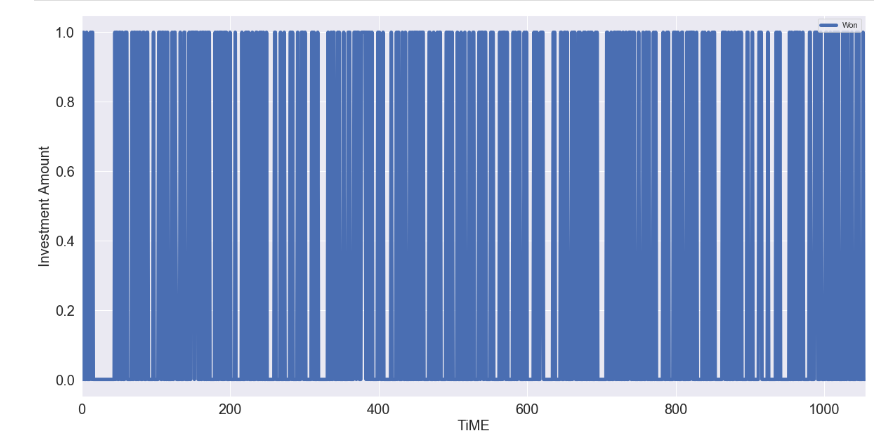

In [113]:
Image("Tablo/blue_waves.png")

Look at all of those beautiful colours! Most meaningful visulization ever? Experts have doubts.

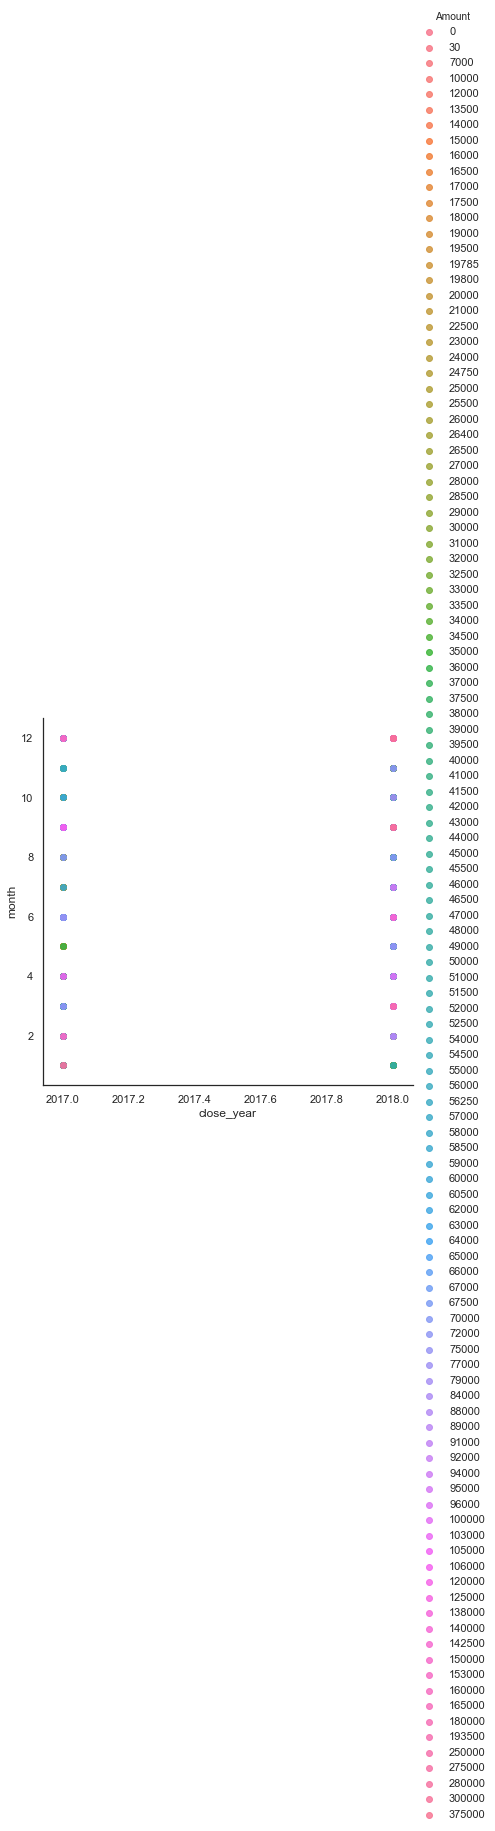

In [114]:
sns.lmplot(x='close_year', y='month', fit_reg=False, data=df, hue='Amount',size = 6);